# My grad example

In [1]:
import torch
from torch.autograd import gradcheck

import splat.test.checked_covariance_derivatives as derivatives

seed = torch.randint(0, 1000000, (1,))
torch.manual_seed(seed)
r = torch.randn(1, 4, requires_grad=True, dtype=torch.float64)
s = torch.randn(1, 3, requires_grad=True, dtype=torch.float64)
u = torch.randn(3, 3, requires_grad=False, dtype=torch.float64)
# print(r)
# print(s)
# print(u)

output = derivatives.r_s_to_cov_2d(r, s, u)
print("output", output)

loss_my_grad = output.sum()

loss_my_grad.backward()

print(r.grad)
print(s.grad)

gradcheck(derivatives.r_s_to_cov_2d, (r, s, u))

output tensor([[[-7.2991, 19.6675],
         [11.1833, -6.9848]]], dtype=torch.float64,
       grad_fn=<invert_2x2_matrixBackward>)
tensor([[ 4.6789, -0.9452,  2.2097,  2.2289]], dtype=torch.float64)
tensor([[-88.9044,   2.8786, -20.5994]], dtype=torch.float64)


True

# Auto grad example

In [2]:
import torch

import splat.test.auto_functions as auto_functions

torch.manual_seed(seed)
r = torch.randn(1, 4, requires_grad=True, dtype=torch.float64)
s = torch.randn(1, 3, requires_grad=True, dtype=torch.float64)
u = torch.randn(3, 3, requires_grad=True, dtype=torch.float64)
# print(r)
# print(s)
# print(u)

output = auto_functions.r_s_to_cov_2d_auto(r, s, u)
print("output", output)

loss_auto_grad = output.sum()
loss_auto_grad.backward()

print(r.grad)
print(s.grad)

output tensor([[[-7.2991, 19.6675],
         [11.1833, -6.9848]]], dtype=torch.float64, grad_fn=<CopySlices>)
tensor([[ 4.6789, -0.9452,  2.2097,  2.2289]], dtype=torch.float64)
tensor([[-88.9044,   2.8786, -20.5994]], dtype=torch.float64)


# Toy gaussian example auto example

r_s_to_cov_2d tensor([[[0.0100, -0.0000],
         [-0.0000, 0.0100]]], grad_fn=<CopySlices>)


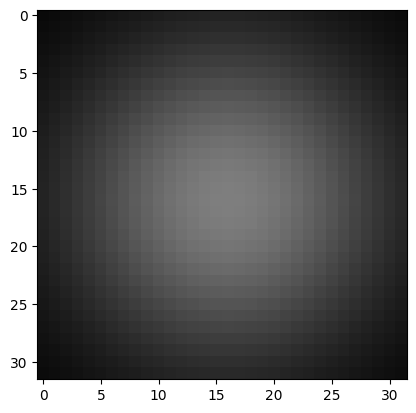

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from splat.test.create_image_auto import (
    Camera, Gaussian_Covariance_Test, create_image_covariance_test_auto
)

torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[16, 16, 1]], dtype=torch.float32).requires_grad_(False)
r = torch.tensor([[1, 0, 0, 0]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .1, .1]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(False)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(False)

gaussian = Gaussian_Covariance_Test(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0

output_auto = create_image_covariance_test_auto(camera, gaussian, height, width)
plt.imshow(output_auto.detach().numpy())

# Toy gaussian custom example

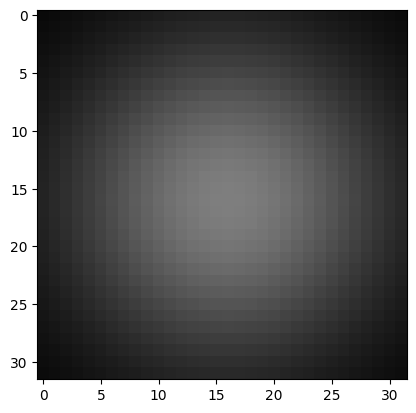

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from splat.test.create_image_auto import (
    Camera, Gaussian_Covariance_Test
)
from splat.test.create_image_custom import (
    create_image_covariance_test
)
torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[16, 16, 1]], dtype=torch.float32).requires_grad_(False)
r = torch.tensor([[1, 0, 0, 0]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .1, .1]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(False)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(False)

gaussian = Gaussian_Covariance_Test(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0

output_custom = create_image_covariance_test(camera, gaussian, height, width)
plt.imshow(output.detach().numpy())